`Developing NLP and ML project:`
    
    - Collecting data
    - Understand Problem statement 
    - since it is text we need to follow NLP PipeLine
    - Developing ML Model
    - Testing model 
    - Save the model 
    - Load the model and test once again 
    - Depoly in any cloud [AWS , IBM , Google cloud , Mircosoft Azure , Heroku saleforce]
    

In [1]:
import numpy as np 
import pandas as pd 

`load the dataset and check whether important fetures are available or not:`

In [2]:
data = pd.read_csv('./spam.csv', encoding="ISO-8859-1")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
data.shape  # Number of rows and number of columns:

(5572, 5)

`Since feature 3 , 4 , 5 having lot of Null values I am going to check the count`

In [4]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
data.columns[2:]

Index(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [6]:
for i in data.columns[2:]:
    print('Number of unique content in ',i,'is :',data[i].unique())

Number of unique content in  Unnamed: 2 is : [nan ' PO Box 5249'
 ' the person is definitely special for u..... But if the person is so special'
 ' HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE JEN XXX\\""'
 ' wanted to say hi. HI!!!\\" Stop? Send STOP to 62468"'
 'this wont even start........ Datz confidence.."' 'GN' '.;-):-D"'
 'just been in bedbut mite go 2 thepub l8tr if uwana mt up?loads a luv Jenxxx.\\""'
 ' bt not his girlfrnd... G o o d n i g h t . . .@"' ' I\'ll come up"'
 ' don\'t miss ur best life for anything... Gud nyt..."'
 ' just as a shop has to give a guarantee on what they sell. B. G."'
 ' But at d end my love compromised me for everything:-(\\".. Gud mornin:-)"'
 ' the toughest is acting Happy with all unspoken pain inside..\\""'
 ' smoke hella weed\\""' '\\" not \\"what i need to do.\\""'
 'JUST GOT PAYED2DAY & I HAVBEEN GIVEN Aå£50 PAY RISE 4MY WORK & HAVEBEEN MADE PRESCHOOLCO-ORDINATOR 2I AM FEELINGOOD LUV\\""'
 ' justthought iåÕd sayhey! how u doin?nearly the endo

In [7]:
data = data.drop(data.columns[2:] , axis = 1)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
data = data.rename(columns={'v1':'target' , 'v2':'E-mails'})

In [9]:
data.head()

,target,E-mails
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


`let me find whether the data is balanced or not`

In [10]:
data['target'].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

`It is a Imbalanced dataset but lets develop model with data what we have`

In [11]:
import matplotlib.pyplot as plt 

<AxesSubplot: xlabel='target', ylabel='count'>

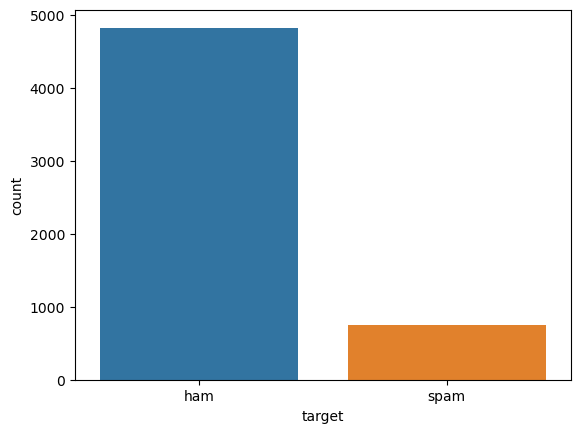

In [12]:
import seaborn as sns 
sns.countplot(x = data['target']) # countplot x , y cordinates:

In [13]:
data.head()

,target,E-mails
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


`Preprocess the data`

- clean the data [punctuations]
- lower text 
- remove stopwords
- Apply stemming or lematization 

In [14]:
data['target'] = data['target'].map({'ham':0 , 'spam':1}).astype(int)

`In the target feature 0-> good incoming mail and 1-> Bad incoming Mail`

In [15]:
data.head()

,target,E-mails
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


`Lets solve indepedent feature:`

In [16]:
for i in data.target:
    print(i)

0
0
1
0
0
1
0
0
1
1
0
1
1
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
1
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
1
1
0
1
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
1
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
1
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
1
0
1
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0


In [17]:
for i in data.index:
    print(data['target'][i])

0
0
1
0
0
1
0
0
1
1
0
1
1
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
1
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
1
1
0
1
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
1
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
1
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
1
0
1
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0


In [18]:
data.head()

,target,E-mails
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


`regex -> is an regular expressions which is used to find patterns in the text data`


`regex : https://docs.python.org/3/library/re.html`
        

In [19]:
a = 'I am computer 230 vision scientist 35 and my mbl number is 7337513242'
c = ''
for i in a:
    if i.isnumeric():
        c+=i
print(c)

230357337513242


`In this regex d refers to numbers`

In [20]:
import re 
a = 'I am computer 230 vision scientist 35 and my mbl number is 7337513242'

sol = re.findall('\d{10}' , a)

print(sol)

['7337513242']


`Using regex I am collecting only text and numbers`

- Ex: Bring me 10 apples from the supermarket:
- Ex: Bring me apples from the supermarket: 

In [21]:
data.head()

,target,E-mails
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


`regex sub: keep what we want and removes what we dont want:`

In [22]:
a = 'I am computer 230 .&* vision scientist 35 and my mbl number is 7337513242'
sol = re.sub('[^a-zA-Z]',' ',a)
sol

'I am computer         vision scientist    and my mbl number is           '

`Applying same logic for first row:`
    

In [23]:
print(data['E-mails'][0])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


In [24]:
import nltk 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
s = PorterStemmer()

In [25]:
sol = re.sub('[^a-zA-Z0-9]',' ',data['E-mails'][0])
print(sol)
sol = sol.lower()
sol = sol.split()
sol = [i for i in sol if i not in stopwords.words('english')]
sol = [s.stem(j) for j in sol]
sol = ' '.join(sol)
print()
print(sol)

Go until jurong point  crazy   Available only in bugis n great world la e buffet    Cine there got amore wat   

go jurong point crazi avail bugi n great world la e buffet cine got amor wat


In [26]:
data.head()

,target,E-mails
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
# preprocessing:
clean_text = []
for i in data.index:
    sol = re.sub('[^a-zA-Z0-9]',' ',data['E-mails'][i])
    sol = sol.lower()
    sol = sol.split()
    sol = [i for i in sol if i not in stopwords.words('english')]
    sol = [s.stem(j) for j in sol]
    sol = ' '.join(sol)
    clean_text.append(sol)
    

In [28]:
clean_text

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send 1 50 rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun',
 'winner valu network custom select receivea 900 prize reward claim call 09061701461 claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash 100 20 000 pound txt csh11 send 87575 cost 150p day 6day 16 tsandc appli repli hl 4 info',
 'urgent 1 week free mem

`Need to convert them into numbers:` 

`Using TF-IDF I am converting text to numbers`


In [29]:
import sklearn 

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
tfidf = TfidfVectorizer()

In [32]:
result = tfidf.fit_transform(clean_text)

In [33]:
clean_text[1]

'ok lar joke wif u oni'

In [34]:
independent = result.toarray()

In [35]:
independent


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
data['target']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5572, dtype: int32

- NLP project using with ML 

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(independent, data['target'], test_size=0.33, random_state=42)

In [61]:
len(X_train) , len(y_train)

(3733, 3733)

In [62]:
## Balancing the data 

print('The value 1 in dependent variable = ',sum(y_train == 1))
print('The value 0 in dependent variable = ',sum(y_train == 0))

#for maintain data balacned we are using upsampling 

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)

X_train_res , y_train_res = sm.fit_resample(X_train , y_train)
print('--------------------------------------------------------------------------')

print('The value 1 in dependent variable = ',sum(y_train_res == 1))
print('The value 1 in dependent variable = ',sum(y_train_res == 0))


The value 1 in dependent variable =  495
The value 0 in dependent variable =  3238
--------------------------------------------------------------------------
The value 1 in dependent variable =  3238
The value 1 in dependent variable =  3238


`Need to develop ML Model`

- Naive bayes
- KNN
- Logistic Regression
- Decision Tree
- Random Forest

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [41]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

#### KNN

In [42]:
a = 5
print('the value of a is {}'.format(a))

the value of a is 5


In [63]:
def knn(X_train,X_test,y_train,y_test):
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train , y_train)  # fitting training data
    y_train_pred = knn.predict(X_train)
    print('---Training Accuracy---')
    print('Training_accuracy : {}'.format(accuracy_score(y_train , y_train_pred)))
    y_test_pred = knn.predict(X_test)
    print('--Test Accuracy---')
    print('Test_accuracy : {}'.format(accuracy_score(y_test , y_test_pred)))
    print('---confusion_matrix---')
    print(confusion_matrix(y_test , y_test_pred))
    print('---classification report---')
    print(classification_report(y_test , y_test_pred))    

In [64]:
# Logistic Regression:
def LR(X_train,X_test,y_train,y_test):
    lr = LogisticRegression()
    lr.fit(X_train , y_train)  # fitting training data
    y_train_pred = lr.predict(X_train)
    print('---Training Accuracy---')
    print('Training_accuracy : {}'.format(accuracy_score(y_train , y_train_pred)))
    y_test_pred = lr.predict(X_test)
    print('--Test Accuracy---')
    print('Test_accuracy : {}'.format(accuracy_score(y_test , y_test_pred)))
    print('---confusion_matrix---')
    print(confusion_matrix(y_test , y_test_pred))
    print('---classification report---')
    print(classification_report(y_test , y_test_pred))  

In [65]:
## Naive bayes:

def naive(X_train,X_test,y_train,y_test):
    nb = MultinomialNB()
    nb.fit(X_train , y_train)  # fitting training data
    y_train_pred = nb.predict(X_train)
    print('---Training Accuracy---')
    print('Training_accuracy : {}'.format(accuracy_score(y_train , y_train_pred)))
    y_test_pred = nb.predict(X_test)
    print('--Test Accuracy---')
    print('Test_accuracy : {}'.format(accuracy_score(y_test , y_test_pred)))
    print('---confusion_matrix---')
    print(confusion_matrix(y_test , y_test_pred))
    print('---classification report---')
    print(classification_report(y_test , y_test_pred))  

In [66]:
# Decision tree 

def dt(X_train,X_test,y_train,y_test):
    dt = DecisionTreeClassifier()
    dt.fit(X_train , y_train)  # fitting training data
    y_train_pred = dt.predict(X_train)
    print('---Training Accuracy---')
    print('Training_accuracy : {}'.format(accuracy_score(y_train , y_train_pred)))
    y_test_pred = dt.predict(X_test)
    print('--Test Accuracy---')
    print('Test_accuracy : {}'.format(accuracy_score(y_test , y_test_pred)))
    print('---confusion_matrix---')
    print(confusion_matrix(y_test , y_test_pred))
    print('---classification report---')
    print(classification_report(y_test , y_test_pred))  

In [67]:
# Random forest 
def rf(X_train,X_test,y_train,y_test):
    rf = RandomForestClassifier(n_estimators=100)
    rf.fit(X_train , y_train)  # fitting training data
    y_train_pred = rf.predict(X_train)
    print('---Training Accuracy---')
    print('Training_accuracy : {}'.format(accuracy_score(y_train , y_train_pred)))
    y_test_pred = rf.predict(X_test)
    print('--Test Accuracy---')
    print('Test_accuracy : {}'.format(accuracy_score(y_test , y_test_pred)))
    print('---confusion_matrix---')
    print(confusion_matrix(y_test , y_test_pred))
    print('---classification report---')
    print(classification_report(y_test , y_test_pred))  

In [68]:
def calling(X_train,X_test,y_train,y_test):  # calling function 
    print('---knn----')
    knn(X_train,X_test,y_train,y_test)
    print('---logistic Regression-----')
    LR(X_train,X_test,y_train,y_test)
    print('---Naive bayes---')
    naive(X_train,X_test,y_train,y_test)
    print('---Decision Tree---')
    dt(X_train,X_test,y_train,y_test)
    print('---Random forest')
    rf(X_train,X_test,y_train,y_test)

In [69]:
calling(X_train_res,X_test,y_train_res,y_test)

---knn----
---Training Accuracy---
Training_accuracy : 0.9983014206300185
--Test Accuracy---
Test_accuracy : 0.9472539423599783
---confusion_matrix---
[[1584    3]
 [  94  158]]
---classification report---
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1587
           1       0.98      0.63      0.77       252

    accuracy                           0.95      1839
   macro avg       0.96      0.81      0.87      1839
weighted avg       0.95      0.95      0.94      1839

---logistic Regression-----
---Training Accuracy---
Training_accuracy : 0.993823347745522
--Test Accuracy---
Test_accuracy : 0.9755301794453507
---confusion_matrix---
[[1572   15]
 [  30  222]]
---classification report---
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1587
           1       0.94      0.88      0.91       252

    accuracy                           0.98      1839
   macro avg       0.96    

In [70]:
### Since the test accuracy and validation report is high for random forest I am selecting it as my final model:


def rf(X_train,X_test,y_train,y_test):
    rf = RandomForestClassifier(n_estimators=100)
    rf.fit(X_train , y_train)  # fitting training data
    y_train_pred = rf.predict(X_train)
    print('---Training Accuracy---')
    print('Training_accuracy : {}'.format(accuracy_score(y_train , y_train_pred)))
    y_test_pred = rf.predict(X_test)
    print('--Test Accuracy---')
    print('Test_accuracy : {}'.format(accuracy_score(y_test , y_test_pred)))
    print('---confusion_matrix---')
    print(confusion_matrix(y_test , y_test_pred))
    print('---classification report---')
    print(classification_report(y_test , y_test_pred))  

In [71]:
rf(X_train_res,X_test,y_train_res,y_test)

---Training Accuracy---
Training_accuracy : 1.0
--Test Accuracy---
Test_accuracy : 0.9820554649265906
---confusion_matrix---
[[1587    0]
 [  33  219]]
---classification report---
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1587
           1       1.00      0.87      0.93       252

    accuracy                           0.98      1839
   macro avg       0.99      0.93      0.96      1839
weighted avg       0.98      0.98      0.98      1839



In [72]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_res , y_train_res) 

RandomForestClassifier()

### Checking with real data:

In [73]:
def predictions(text):
    c = []
    sol = re.sub('[^a-zA-Z0-9]',' ',text)
    sol = sol.lower()
    sol = sol.split()
    sol = [i for i in sol if i not in stopwords.words('english')]
    sol = [s.stem(j) for j in sol]
    sol = ' '.join(sol)
    print(sol)
    c.append(sol)
    sol = tfidf.transform(c)

    # Making predictions:
    final_vector = sol.toarray()
    print(final_vector)
    print('---predictions---')
    rf.predict(final_vector)
    if rf.predict(final_vector)[0] == 0:
        print('Ham Mail')
    else:
        print('Spam Mail')

In [74]:
predictions('I went to a movie and movie was really good and Mostly it will be a sensation')


went movi movi realli good mostli sensat
[[0. 0. 0. ... 0. 0. 0.]]
---predictions---
Ham Mail


In [75]:
predictions('Flipcart is is offering 20% freee discount want to get it contact me')

flipcart offer 20 freee discount want get contact
[[0. 0. 0. ... 0. 0. 0.]]
---predictions---
Ham Mail


In [76]:
predictions('You are stupid and movie was worst then ever')

stupid movi worst ever
[[0. 0. 0. ... 0. 0. 0.]]
---predictions---
Ham Mail


In [77]:
predictions('I will kill you really')

kill realli
[[0. 0. 0. ... 0. 0. 0.]]
---predictions---
Ham Mail


In [78]:
predictions('you won lottery ticket')

lotteri ticket
[[0. 0. 0. ... 0. 0. 0.]]
---predictions---
Ham Mail


In [80]:
predictions("""
“Join my Telegram Group for FREE stock tips”

“Learn A to Z about Options Trading for just 69999”

Every day many innocent people fall for such headlines and lose their hard-earned money to frauds, who sell the idea of high returns within a short time to them.

It has become essential for a trader to know all the ways he can get scammed.

To help you do that, we have launched our new web series, “Frauds of Tradingpur” where we highlight all the major scams happening in the stock ma
""")

join telegram group free stock tip learn z option trade 69999 everi day mani innoc peopl fall headlin lose hard earn money fraud sell idea high return within short time becom essenti trader know way get scam help launch new web seri fraud tradingpur highlight major scam happen stock
[[0. 0. 0. ... 0. 0. 0.]]
---predictions---
Ham Mail


In [90]:
predictions("Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's")

free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri question std txt rate c appli 08452810075over18
[[0. 0. 0. ... 0. 0. 0.]]
---predictions---
Spam Mail
